
# 数据抓取：

> # Beautifulsoup简介
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

# 需要解决的问题 

- 页面解析
- 获取Javascript隐藏源数据
- 自动翻页
- 自动登录
- 连接API接口


In [1]:
import urllib2
from bs4 import BeautifulSoup

- 一般的数据抓取，使用urllib2和beautifulsoup配合就可以了。
- 尤其是对于翻页时url出现规则变化的网页，只需要处理规则化的url就可以了。
- 以简单的例子是抓取天涯论坛上关于某一个关键词的帖子。
    - 在天涯论坛，关于雾霾的帖子的第一页是：
http://bbs.tianya.cn/list.jsp?item=free&nextid=0&order=8&k=雾霾
    - 第二页是：
http://bbs.tianya.cn/list.jsp?item=free&nextid=1&order=8&k=雾霾


# Beautiful Soup
> Beautiful Soup is a Python library designed for quick turnaround projects like screen-scraping. Three features make it powerful:

- Beautiful Soup provides a few simple methods. It doesn't take much code to write an application
- Beautiful Soup automatically converts incoming documents to Unicode and outgoing documents to UTF-8. Then you just have to specify the original encoding.
- Beautiful Soup sits on top of popular Python parsers like lxml and html5lib.


# Install beautifulsoup4

### open your terminal/cmd

> $ pip install beautifulsoup4

# 第一个爬虫

Beautifulsoup Quick Start 

http://www.crummy.com/software/BeautifulSoup/bs4/doc/

![](./img/bs.jpg)


In [3]:
url = 'file:///Users/chengjun/GitHub/cjc/data/test.html'
# http://computational-class.github.io/cjc/data/test.html
content = urllib2.urlopen(url).read() 
soup = BeautifulSoup(content, 'html.parser') 
soup

<html><head><title>The Dormouse's story</title></head>\n<body>\n<p class="title"><b>The Dormouse's story</b></p>\n<p class="story">Once upon a time there were three little sisters; and their names were\n<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,\n<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and\n<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;\nand they lived at the bottom of a well.</p>\n<p class="story">...</p></body></html>

# html.parser
Beautiful Soup supports the html.parser included in Python’s standard library

# lxml
but it also supports a number of third-party Python parsers. One is the lxml parser `lxml`. Depending on your setup, you might install lxml with one of these commands:

> $ apt-get install python-lxml

> $ easy_install lxml

> $ pip install lxml

# html5lib
Another alternative is the pure-Python html5lib parser `html5lib`, which parses HTML the way a web browser does. Depending on your setup, you might install html5lib with one of these commands:

> $ apt-get install python-html5lib

> $ easy_install html5lib

> $ pip install html5lib

In [52]:
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


- html
    - head
        - title
    - body
        - p (class = 'title', 'story' )
            - a (class = 'sister')
                - href/id

# Select 方法

In [69]:
soup.select('.sister')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [68]:
soup.select('.story')

[<p class="story">Once upon a time there were three little sisters; and their names were\n<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,\n<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and\n<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;\nand they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [57]:
soup.select('#link2')

[<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>]

In [67]:
soup.select('#link2')[0]['href']

u'http://example.com/lacie'

# find_all方法

In [4]:
soup('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were\n<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,\n<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and\n<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;\nand they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [5]:
soup.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were\n<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,\n<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and\n<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;\nand they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [10]:
[i.text for i in soup('p')]

[u"The Dormouse's story",
 u'Once upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.',
 u'...']

In [11]:
for i in soup('p'):
    print i.text

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


In [72]:
for tag in soup.find_all(True):
    print(tag.name)

html
head
title
body
p
b
p
a
a
a
p


In [58]:
soup('head') # or soup.head

[<head><title>The Dormouse's story</title></head>]

In [59]:
soup('body') # or soup.body

[<body>\n<p class="title"><b>The Dormouse's story</b></p>\n<p class="story">Once upon a time there were three little sisters; and their names were\n<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,\n<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and\n<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;\nand they lived at the bottom of a well.</p>\n<p class="story">...</p></body>]

In [29]:
soup('title')  # or  soup.title

[<title>The Dormouse's story</title>]

In [60]:
soup('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were\n<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,\n<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and\n<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;\nand they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [62]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [30]:
soup.title.name

u'title'

In [31]:
soup.title.string

u"The Dormouse's story"

In [48]:
soup.title.text
# 推荐使用text方法

u"The Dormouse's story"

In [32]:
soup.title.parent.name

u'head'

In [33]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [34]:
soup.p['class']

[u'title']

In [50]:
soup.find_all('p', {'class', 'title'})

[<p class="title"><b>The Dormouse's story</b></p>]

In [78]:
soup.find_all('p', class_= 'title')

[<p class="title"><b>The Dormouse's story</b></p>]

In [49]:
soup.find_all('p', {'class', 'story'})

[<p class="story">Once upon a time there were three little sisters; and their names were\n<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,\n<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and\n<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;\nand they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [57]:
soup.find_all('p', {'class', 'story'})[0].find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [35]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [79]:
soup('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [37]:
soup.find(id="link3")

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [36]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [80]:
soup.find_all('a', {'class', 'sister'}) # compare with soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [81]:
soup.find_all('a', {'class', 'sister'})[0]

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [44]:
soup.find_all('a', {'class', 'sister'})[0].text

u'Elsie'

In [46]:
soup.find_all('a', {'class', 'sister'})[0]['href']

u'http://example.com/elsie'

In [47]:
soup.find_all('a', {'class', 'sister'})[0]['id']

u'link1'

In [71]:
soup.find_all(["a", "b"])

[<b>The Dormouse's story</b>,
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [38]:
print(soup.get_text())

The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


***
***
# 数据抓取：
   > # 根据URL抓取微信公众号文章内容
***
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com


In [11]:
from IPython.display import display_html, HTML
HTML('<iframe src=http://mp.weixin.qq.com/s?__biz=MzA3MjQ5MTE3OA==&\
mid=206241627&idx=1&sn=471e59c6cf7c8dae452245dbea22c8f3&3rd=MzA3MDU4NTYzMw==&scene=6#rd\
width=500 height=500></iframe>')
# the webpage we would like to crawl

# 查看源代码

# Inspect

In [4]:
url = "http://mp.weixin.qq.com/s?__biz=MzA3MjQ5MTE3OA==&\
mid=206241627&idx=1&sn=471e59c6cf7c8dae452245dbea22c8f3&3rd=MzA3MDU4NTYzMw==&scene=6#rd"
content = urllib2.urlopen(url).read() #获取网页的html文本
soup = BeautifulSoup(content, 'html.parser') 

In [6]:
title = soup.select("div .title #id1 img ")
for i in title:
    print i.text

In [7]:
print soup.find('h2', {'class', 'rich_media_title'}).text


                    南大新传 | 微议题：地震中民族自豪—“中国人先撤”                


In [20]:
print soup.find('div', {'class', 'rich_media_meta_list'})


<div class="rich_media_meta_list">
<em class="rich_media_meta rich_media_meta_text" id="post-date">2015-05-04</em>
<em class="rich_media_meta rich_media_meta_text">南大新传院</em>
<a class="rich_media_meta rich_media_meta_link rich_media_meta_nickname" href="javascript:void(0);" id="post-user">微议题排行榜</a>
<span class="rich_media_meta rich_media_meta_text rich_media_meta_nickname">微议题排行榜</span>
<div class="profile_container" id="js_profile_qrcode" style="display:none;">
<div class="profile_inner">
<strong class="profile_nickname">微议题排行榜</strong>
<img alt="" class="profile_avatar" id="js_profile_qrcode_img" src="">
<p class="profile_meta">
<label class="profile_meta_label">微信号</label>
<span class="profile_meta_value">IssuesRank</span>
</p>
<p class="profile_meta">
<label class="profile_meta_label">功能介绍</label>
<span class="profile_meta_value">感谢关注《微议题排行榜》。我们是南京大学新闻传播学院，计算传播学实验中心，致力于研究社会化媒体时代的公共议程，发布新媒体平台的议题排行榜。</span>
</p>
</img></div>
<span class="profile_arrow_wrp" id="js_profile_arrow_wrp">

In [23]:
print soup.find('em').text


2015-05-04


In [29]:
article = soup.find('div', {'class' , 'rich_media_content'}).text
print article


点击上方“微议题排行榜”可以订阅哦！导读2015年4月25日，尼泊尔发生8.1级地震，造成至少7000多人死亡，中国西藏、印度、孟加拉国、不丹等地均出现人员伤亡。尼泊尔地震后，祖国派出救援机接国人回家，这一“先撤”行为被大量报道，上演了一出霸道总裁不由分说爱国民的新闻。我们对“地震”中人的关注，远远小于国民尊严的保护。通过“撤离”速度来证明中国的影响力也显得有失妥当，灾难应急管理、救援和灾后重建能力才应是“地震”关注焦点。  热词图现 本文以“地震”为关键词，选取了2015年4月10日至4月30日期间微议题TOP100阅读排行进行分析。根据微议题TOP100标题的词频统计，我们可以看出有关“地震”的话题最热词汇的有“尼泊尔”、“油价”、“发改委”。4月25日尼泊尔发生了8级地震，深受人们的关注。面对国外灾难性事件，微媒体的重心却转向“油价”、“发改委”、“祖国先撤”，致力于将世界重大事件与中国政府关联起来。  微议题演化趋势 总文章数总阅读数从4月10日到4月30日，有关“地震”议题出现三个峰值，分别是在4月15日内蒙古地震，20日台湾地震和25日尼泊尔地震。其中对台湾地震与内蒙古地震报道文章较少，而对尼泊尔地震却给予了极大的关注，无论是在文章量还是阅读量上都空前增多。内蒙古、台湾地震由于级数较小，关注少，议程时间也比较短，一般3天后就会淡出公共视野。而尼泊尔地震虽然接近性较差，但规模大，且衍生话题性较强，其讨论热度持续了一周以上。  议题分类 如图，我们将此议题分为6大类。1尼泊尔地震这类文章是对4月25日尼泊尔地震的新闻报道，包括现场视频，地震强度、规模，损失程度、遇难人员介绍等。更进一步的，有对尼泊尔地震原因探析，认为其处在板块交界处，灾难是必然的。因尼泊尔是佛教圣地，也有从佛学角度解释地震的启示。2国内地震报道主要是对10日内蒙古、甘肃、山西等地的地震，以及20日台湾地震的报道。偏重于对硬新闻的呈现，介绍地震范围、级数、伤亡情况，少数几篇是对甘肃地震的辟谣，称其只是微震。3中国救援回应地震救援的报道大多是与尼泊尔地震相关，并且80%的文章是中国政府做出迅速反应派出救援机接国人回家。以“中国人又先撤了”，来为祖国点赞。少数几篇是滴滴快的、腾讯基金、万达等为尼泊尔捐款的消息。4发改委与地震这类文章内容相似，纯粹是对发改委的调侃。称其“预测”地震非常准确，只要一

In [8]:
rmml = soup.find('div', {'class', 'rich_media_meta_list'})
date = rmml.find(id = 'post-date').text
rmc = soup.find('div', {'class', 'rich_media_content'})
content = rmc.get_text()
print title
print date
print content

[]
2015-05-04

点击上方“微议题排行榜”可以订阅哦！导读2015年4月25日，尼泊尔发生8.1级地震，造成至少7000多人死亡，中国西藏、印度、孟加拉国、不丹等地均出现人员伤亡。尼泊尔地震后，祖国派出救援机接国人回家，这一“先撤”行为被大量报道，上演了一出霸道总裁不由分说爱国民的新闻。我们对“地震”中人的关注，远远小于国民尊严的保护。通过“撤离”速度来证明中国的影响力也显得有失妥当，灾难应急管理、救援和灾后重建能力才应是“地震”关注焦点。  热词图现 本文以“地震”为关键词，选取了2015年4月10日至4月30日期间微议题TOP100阅读排行进行分析。根据微议题TOP100标题的词频统计，我们可以看出有关“地震”的话题最热词汇的有“尼泊尔”、“油价”、“发改委”。4月25日尼泊尔发生了8级地震，深受人们的关注。面对国外灾难性事件，微媒体的重心却转向“油价”、“发改委”、“祖国先撤”，致力于将世界重大事件与中国政府关联起来。  微议题演化趋势 总文章数总阅读数从4月10日到4月30日，有关“地震”议题出现三个峰值，分别是在4月15日内蒙古地震，20日台湾地震和25日尼泊尔地震。其中对台湾地震与内蒙古地震报道文章较少，而对尼泊尔地震却给予了极大的关注，无论是在文章量还是阅读量上都空前增多。内蒙古、台湾地震由于级数较小，关注少，议程时间也比较短，一般3天后就会淡出公共视野。而尼泊尔地震虽然接近性较差，但规模大，且衍生话题性较强，其讨论热度持续了一周以上。  议题分类 如图，我们将此议题分为6大类。1尼泊尔地震这类文章是对4月25日尼泊尔地震的新闻报道，包括现场视频，地震强度、规模，损失程度、遇难人员介绍等。更进一步的，有对尼泊尔地震原因探析，认为其处在板块交界处，灾难是必然的。因尼泊尔是佛教圣地，也有从佛学角度解释地震的启示。2国内地震报道主要是对10日内蒙古、甘肃、山西等地的地震，以及20日台湾地震的报道。偏重于对硬新闻的呈现，介绍地震范围、级数、伤亡情况，少数几篇是对甘肃地震的辟谣，称其只是微震。3中国救援回应地震救援的报道大多是与尼泊尔地震相关，并且80%的文章是中国政府做出迅速反应派出救援机接国人回家。以“中国人又先撤了”，来为祖国点赞。少数几篇是滴滴快的、腾讯基金、万达等为尼泊尔捐款的消息。4发改委与地震这类文章内容相似，纯粹是对发改委的调侃。称其

# 尝试抓取阅读数和点赞数

In [47]:
url = 'http://mp.weixin.qq.com/s?src=3&timestamp=1463191394&ver=1&signature=cV3qMIBeBTS6i8cJJOPu98j-H9veEPx0Y0BekUE7F6*sal9nkYG*w*FwDiaySIfR4XZL-XFbo2TFzrMxEniDETDYIMRuKmisV8xjfOcCjEWmPkYfK57G*cffYv4JxuM*RUtN8LUIg*n6Kd0AKB8--w=='

In [48]:
content = urllib2.urlopen(url).read() #获取网页的html文本
soup = BeautifulSoup(content, 'html.parser') 

<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<meta content="width=device-width,initial-scale=1.0,maximum-scale=1.0,user-scalable=0" name="viewport"/>
<meta content="yes" name="apple-mobile-web-app-capable">
<meta content="black" name="apple-mobile-web-app-status-bar-style">
<meta content="telephone=no" name="format-detection">
<script type="text/javascript">
            window.logs = {
                pagetime: {}
            };
            window.logs.pagetime['html_begin'] = (+new Date());
        </script>
<script type="text/javascript"> 

    var page_begintime = (+new Date());

    var biz = ""||"MjM5NzE0ODM2MA==";
    var sn = "" || ""|| "be39ae0b1519b7f9ae644d4f0a0f449b";
    var mid = "" || ""|| "400316403";
    var idx = "" || "" || "2";

    
    var is_rumor = ""*1;
    var norumor = ""*1;
    if (!!is_rumor&&!norumor){
      if (!document.referrer || document.referrer
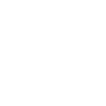

In [49]:
print soup

In [37]:
soup.find(id='sg_likeNum3')

<span class="praise_num" id="sg_likeNum3"></span>

# 作业：

- 抓取复旦新媒体微信公众号最新一期的内容
